In [95]:
import pandas as pd
import sqlite3
conn = sqlite3.connect
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")

In [82]:
name_basics = pd.read_csv('imdb.name.basics.csv.gz')

In [83]:
title_principals = pd.read_csv('imdb.title.principals.csv.gz')

In [84]:
title_pricipals_1 = title_principals.drop('job', axis=1)

In [17]:
main_pricipals = title_pricipals_1.drop('characters', axis=1)

In [85]:
title_basics = pd.read_csv('imdb.title.basics.csv.gz')

In [6]:
title_basics_1 = title_basics.drop('original_title', axis=1)

In [7]:
title_basics_2 = title_basics_1.drop('start_year', axis=1)

In [8]:
main_titles = title_basics_2.drop('runtime_minutes', axis=1)

In [9]:
director = main_titles.merge(main_pricipals, on="tconst", how='inner')

In [31]:
categories.drop_duplicates(subset ='primary_title',
                     keep = False, inplace = True)

<ipython-input-31-0a0cf95065e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories.drop_duplicates(subset ='primary_title',


In [73]:
categories = director[director['category'] == 'director']
# director.drop(categories, inplace=False)

In [86]:
categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

<ipython-input-86-6c0c5c120dbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)


In [72]:
categories_1 = (categories.explode('genres'))

In [71]:
genres = categories_1[categories_1['genres'] == 'Adventure']
# director.drop(genres, inplace=False)

In [61]:
name_basics_1 = name_basics.drop('birth_year', axis=1)

In [63]:
name_basics_2 = name_basics_1.drop('death_year', axis=1)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [64]:
name_basics_3 = name_basics_2.drop('known_for_titles', axis=1)

In [70]:
name_basics_3["primary_profession"] = name_basics_3["primary_profession"].apply(lambda x: x.split(",") if type(x) == str else x)

In [69]:
name_basics_4 = (name_basics_3.explode('primary_profession'))

In [80]:
final_name = name_basics_4[name_basics_4['primary_profession'] == 'director']
# director.drop(primary_profession, inplace=False)

In [79]:
director_merge = genres.merge(final_name, on="nconst", how='inner')
director_merge.head()

,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,tt0293429,Mortal Kombat,Adventure,1,nm2585406,director,Simon McQuoid,director
1,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,6,nm0820800,director,Daniel St. Pierre,director
2,tt0884726,Legends of Oz: Dorothy's Return,Adventure,6,nm0820800,director,Daniel St. Pierre,director
3,tt0329539,Rice Girl,Adventure,5,nm0278780,director,Michael Fischa,director
4,tt0331314,Bunyan and Babe,Adventure,5,nm8625898,director,Louis Ross,director


In [91]:
top_five = director_merge.primary_name.value_counts().head()
top_five

Kôbun Shizuno      9
David Yates        8
Kunihiko Yuyama    8
Mark Polonia       6
Melanie Simka      6
Name: primary_name, dtype: int64

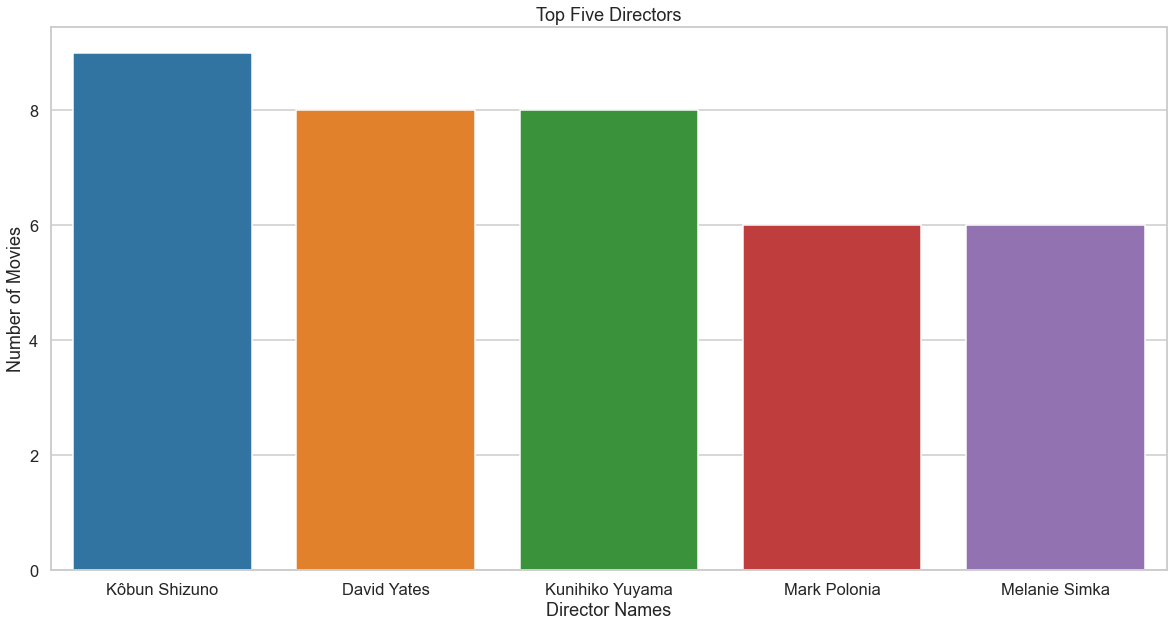

In [98]:
fig, ax = plt.subplots(figsize = (20,10))
top_five_graph = sns.barplot(x=top_five.index, y=top_five.values)
top_five_graph.set(title="Top Five Directors", xlabel="Director Names", ylabel="Number of Movies");

Which director has made the top grossing movie?